## O


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe



#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/gemstones.csv"
df_otherrings = pd.read_csv(filename )

df_otherrings['Stone2_Carat_cat'].fillna(0, inplace=True)
df_otherrings['Stone1_Carat_cat'].fillna(0, inplace=True)


In [4]:
df_otherrings.isnull().sum()

Metal                0
Stone1_Stone         0
Stone1_Color         0
Stone1_Cut           0
Stone2_Stone        69
Stone2_Color        69
Stone2_Cut          69
Price_Category       0
Stone1_Carat_cat     0
Stone2_Carat_cat     0
dtype: int64

In [5]:
df_otherrings[df_otherrings['Stone1_Carat_cat'].isnull()]

,Metal,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Stone,Stone2_Color,Stone2_Cut,Price_Category,Stone1_Carat_cat,Stone2_Carat_cat


## Applying the Machine Learning models:


Following classification models are used:
1. Logistic Regression
2. Random Forest
3. Stochastic Gradient Descent
4. K-Nearest Neighbor(KNN)


The model evaluation is based on splitting the data into training and test datasets. 

Since the dataset is not too large, GridSearchCV is used for hyperparameter tuning. GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.


Evaluation of the Model is done using Confusion Matrix and Classification Report


## Logistic Regression For Gemstones dataset

In [6]:
#Data is split features and target variable

X = df_otherrings.drop(columns='Price_Category')
y = df_otherrings.Price_Category

#Convert Categorical data to integer data using One Hot Encoding
df_dummy_rings = pd.get_dummies(X)

#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [7]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#LogisticRegression with a random state of 47

from sklearn.linear_model import LogisticRegression


LR_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
lr_default_cv_results = cross_validate(LR_pipe, X_train, y_train, cv=3)
lr_cv_scores = lr_default_cv_results['test_score']

print("Cross Validation Train Score: ",lr_cv_scores)
print('Mean Cross Validation train score: ', np.mean(lr_cv_scores))
print('Standard deviation CV train score: ', np.std(lr_cv_scores))

Cross Validation Train Score:  [0.4        0.36290323 0.37096774]
Mean Cross Validation train score:  0.3779569892473118
Standard deviation CV train score:  0.015930679989278558


## Hyperparameter tuning for Logistic Regression using GridSearchCV

In [8]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#print the best parameters
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with:%r" % (mean, stdev, param))

Best: 0.378000 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


## Fitting the Logistic Regression with the optimal hyperparameters



Train Accuracy Scores:  [0.368      0.36290323 0.36290323]
Mean Cross Validation train score:  0.36460215053763445
Standard deviation CV train score:  0.002402642396289766


Test Accuracy Scores:  [0.40740741 0.33333333 0.41509434]
Mean Cross Validation train score:  0.38527836012112743
Standard deviation CV train score:  0.03686449590693721


Precision Score:  0.3233967271118974
Recall Score: 0.2949086504941695


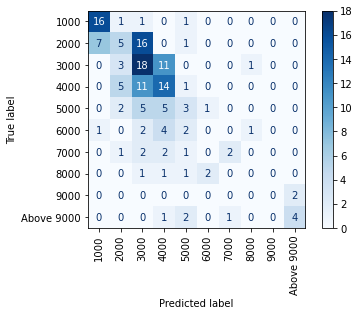



              precision    recall  f1-score   support

        1000       0.67      0.84      0.74        19
        2000       0.29      0.17      0.22        29
        3000       0.32      0.55      0.40        33
        4000       0.37      0.45      0.41        31
        5000       0.25      0.19      0.21        16
        6000       0.00      0.00      0.00        10
        7000       0.67      0.25      0.36         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.67      0.50      0.57         8

    accuracy                           0.39       161
   macro avg       0.32      0.29      0.29       161
weighted avg       0.36      0.39      0.36       161



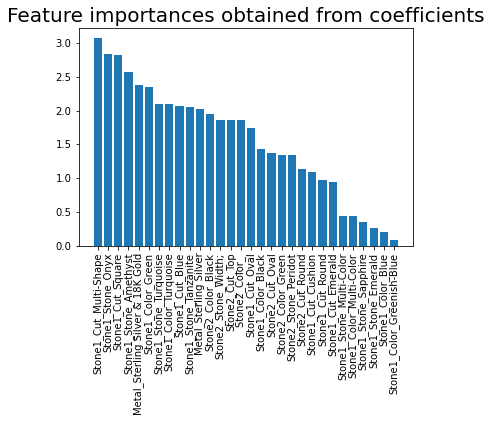

In [9]:
#Use the best parameters found 

logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

from sklearn.model_selection import cross_val_score

logr_train_scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')

print('\n')
print("Train Accuracy Scores: ", logr_train_scores)
print('Mean Cross Validation train score: ', np.mean(logr_train_scores))
print('Standard deviation CV train score: ', np.std(logr_train_scores))

#Predict the test data 
y_pred = logr.predict(X_test)

logr_test_scores = cross_val_score(logr,X_test,y_test,cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", logr_test_scores)
print('Mean Cross Validation train score: ', np.mean(logr_test_scores))
print('Standard deviation CV train score: ', np.std(logr_test_scores))

from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test,y_pred, average='macro')
print('\n')
print('Precision Score: ', precision_lr)
print('Recall Score:', recall_lr)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

from sklearn.metrics import classification_report

print('\n')
print(classification_report(y_test, y_pred))

plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest Model For Gemstone Dataset

In [10]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#RandomForestClassifier with a random state of 47

from sklearn.ensemble import RandomForestClassifier

RF_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            RandomForestClassifier(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train Score:  [0.328      0.32258065 0.38709677]
Mean Cross Validation train score:  0.3458924731182796
Standard deviation CV train score:  0.02921972133158255


## Hyperparameter tuning for Random Forest using GridSearchCV

In [11]:
#Setting the grid parameters

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__criterion': ['entropy','gini'],
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', rf_grid_cv.best_params_ )

rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",rf_best_scores)
print('Mean Cross Validation train score: ', np.mean(rf_best_scores))
print('Standard deviation CV train score: ', np.std(rf_best_scores))

Best Parameters:
  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 379, 'simpleimputer__strategy': 'mean', 'standardscaler': StandardScaler()}


Cross Validation Train Score:  [0.328      0.33870968 0.41935484]
Mean Cross Validation train score:  0.3620215053763441
Standard deviation CV train score:  0.04077587220354699


## Fitting the Random Forest Classifier with the optimal hyperparameters



The Accuracy score of Random Forest prediction:  0.37267080745341613
Precision Score:  0.27850020812520804
Recall Score:  0.27402433458760667


              precision    recall  f1-score   support

        1000       0.67      0.84      0.74        19
        2000       0.41      0.31      0.35        29
        3000       0.36      0.55      0.43        33
        4000       0.34      0.35      0.35        31
        5000       0.08      0.06      0.07        16
        6000       0.00      0.00      0.00        10
        7000       0.50      0.25      0.33         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.43      0.38      0.40         8

    accuracy                           0.37       161
   macro avg       0.28      0.27      0.27       161
weighted avg       0.35      0.37      0.35       161



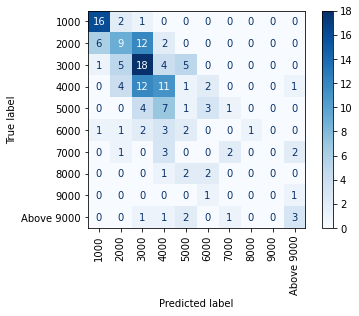

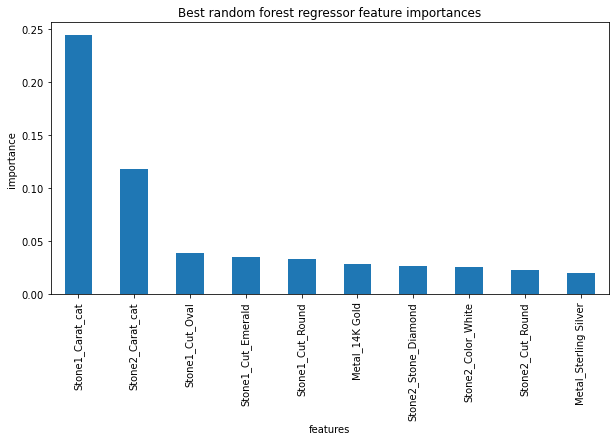

In [12]:
#Predict on the test data

rf_clf = rf_grid_cv.best_estimator_

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test,y_pred_rf, average='macro')
print('\n')
print('The Accuracy score of Random Forest prediction: ',accuracy_score(y_test, y_pred_rf))
print('Precision Score: ', precision_rf)
print('Recall Score: ', recall_rf)

print('\n')
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(rf_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');
plt.show()


## Stochastic Gradient Descent (SGD) for Gemstone Dataset

Train Accuracy Scores:  [0.288      0.38709677 0.36290323]
Mean Cross Validation train score:  0.3459999999999999
Standard deviation CV train score:  0.042184767755590796


Test Accuracy Scores:  [0.27777778 0.31481481 0.26415094]
Mean Cross Validation test score:  0.28558117866293964
Standard deviation CV test score:  0.021406802124725434


Precision Score:  0.26382154882154885
Recall Score: 0.27144713113808894


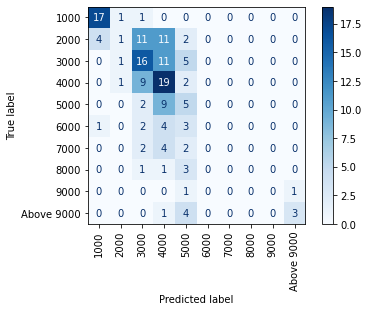



              precision    recall  f1-score   support

        1000       0.77      0.89      0.83        19
        2000       0.25      0.03      0.06        29
        3000       0.36      0.48      0.42        33
        4000       0.32      0.61      0.42        31
        5000       0.19      0.31      0.23        16
        6000       0.00      0.00      0.00        10
        7000       0.00      0.00      0.00         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       0.75      0.38      0.50         8

    accuracy                           0.38       161
   macro avg       0.26      0.27      0.25       161
weighted avg       0.33      0.38      0.32       161



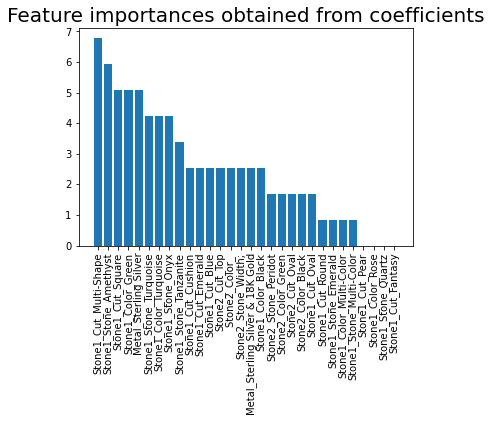

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_train_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", sgd_train_scores)
print('Mean Cross Validation train score: ', np.mean(sgd_train_scores))
print('Standard deviation CV train score: ', np.std(sgd_train_scores))

sgd_test_scores = cross_val_score(sgd_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", sgd_test_scores)
print('Mean Cross Validation test score: ', np.mean(sgd_test_scores))
print('Standard deviation CV test score: ', np.std(sgd_test_scores))

y_pred_sgd = sgd_clf.predict(X_test)

precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_sgd)
print('Recall Score:', recall_sgd)

plot_confusion_matrix(sgd_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_sgd))

importances_sgd = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':sgd_clf.coef_[0]})
importances_sgd = importances_sgd.sort_values(by='Importance',ascending=False)

plt.bar(x=importances_sgd['Attribute'][:30], height=importances_sgd['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## KNeighbors Classifer for  Gemstone Dataset

Train Accuracy Scores:  [0.32       0.32258065 0.34677419]
Mean Cross Validation train score:  0.32978494623655913
Standard deviation CV train score:  0.012059320752816422


Test Accuracy Scores:  [0.24074074 0.2962963  0.33962264]
Mean Cross Validation test score:  0.2922198928488236
Standard deviation CV test score:  0.04047114506004945


Precision Score:  0.2649119094771269
Recall Score: 0.27144713113808894


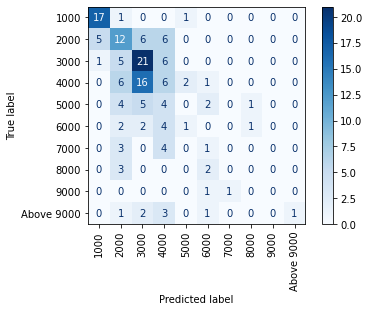



              precision    recall  f1-score   support

        1000       0.74      0.89      0.81        19
        2000       0.32      0.41      0.36        29
        3000       0.40      0.64      0.49        33
        4000       0.18      0.19      0.19        31
        5000       0.00      0.00      0.00        16
        6000       0.00      0.00      0.00        10
        7000       0.00      0.00      0.00         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       1.00      0.12      0.22         8

    accuracy                           0.35       161
   macro avg       0.26      0.23      0.21       161
weighted avg       0.31      0.35      0.31       161



In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


knn_train_scores = cross_val_score(knn_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", knn_train_scores)
print('Mean Cross Validation train score: ', np.mean(knn_train_scores))
print('Standard deviation CV train score: ', np.std(knn_train_scores))

knn_test_scores = cross_val_score(knn_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", knn_test_scores)
print('Mean Cross Validation test score: ', np.mean(knn_test_scores))
print('Standard deviation CV test score: ', np.std(knn_test_scores))

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_knn)
print('Recall Score:', recall_knn)

plot_confusion_matrix(knn_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_knn))

## Hyperparameter tuning for KNN using GridSearchCV¶

In [16]:
#Setting the grid parameters

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
grid_params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
knn_grid_cv = GridSearchCV(knn_clf, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
knn_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', knn_grid_cv.best_params_ )

knn_best_cv_results = cross_validate(knn_grid_cv.best_estimator_, X_train, y_train, cv=3)
knn_best_scores = knn_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",knn_best_scores)
print('Mean Cross Validation train score: ', np.mean(knn_best_scores))
print('Standard deviation CV train score: ', np.std(knn_best_scores))

Best Parameters:
  {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}


Cross Validation Train Score:  [0.368      0.32258065 0.40322581]
Mean Cross Validation train score:  0.36460215053763445
Standard deviation CV train score:  0.03301080172319568


## Fitting the KNN Classifier with the optimal hyperparameters



The Accuracy score of KNN prediction:  0.40993788819875776
Precision Score:  0.400255492646797
Recall Score:  0.2949494099415796


              precision    recall  f1-score   support

        1000       0.67      0.95      0.78        19
        2000       0.38      0.48      0.42        29
        3000       0.43      0.61      0.51        33
        4000       0.25      0.23      0.24        31
        5000       0.27      0.19      0.22        16
        6000       0.00      0.00      0.00        10
        7000       1.00      0.25      0.40         8
        8000       0.00      0.00      0.00         5
        9000       0.00      0.00      0.00         2
  Above 9000       1.00      0.25      0.40         8

    accuracy                           0.41       161
   macro avg       0.40      0.29      0.30       161
weighted avg       0.41      0.41      0.38       161



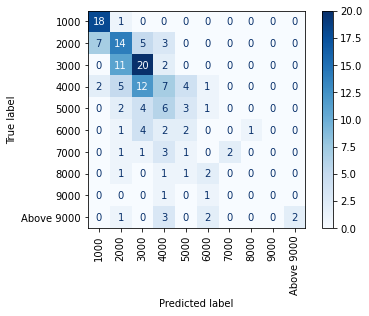

In [17]:
#Predict on the test data

#knn_clf = KNeighborsClassifier('leaf_size': 2, 'n_neighbors': 7, 'p': 1)
knn_clf = knn_grid_cv.best_estimator_

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_knn, average='macro')
print('\n')
print('The Accuracy score of KNN prediction: ',accuracy_score(y_test, y_pred_knn))
print('Precision Score: ', precision_knn)
print('Recall Score: ', recall_knn)

print('\n')
print(classification_report(y_test, y_pred_knn))


plot_confusion_matrix(knn_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


## Comparing the models

In [18]:
Labels = [ 'Logistic Regression','Random Forest','Stochastic Gradient Descent', 'KNN']

precision_test = [precision_lr, precision_rf,precision_sgd,precision_knn]
recall_test =[recall_lr, recall_rf,recall_sgd,recall_knn]


matrix = pd.DataFrame(list(zip(Labels, precision_test, recall_test)), 
               columns =['Algorithm', 'Precision Score', 'Recall score' ]) 
print(matrix)


                     Algorithm  Precision Score  Recall score
0          Logistic Regression         0.323397      0.294909
1                Random Forest         0.278500      0.274024
2  Stochastic Gradient Descent         0.263822      0.271447
3                          KNN         0.400255      0.294949


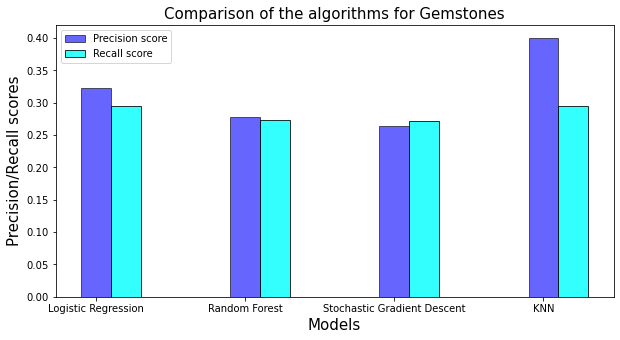

In [19]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms for Gemstones',fontsize=15)
_=plt.bar(index, precision_test,color='b',alpha=0.6,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_test,color='cyan',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)

#_=plt.bar(index,precision_test)
plt.xticks([1, 2,3,4], Labels)
plt.legend()
plt.savefig("27.png")
plt.show()